<a href="https://colab.research.google.com/github/JoshDumo/HDRImaging/blob/main/HDR_Imaging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HDR Imaging
We explore a computational photography technique called High Dynamic Resolution (HDR) Imaging.

## What is HDR
Dynamic range refers to the ability to distinguish between bright sections and dark sections in a scene. Our eyes have excellent (high) dynamic range, about 100000:1 in so called 'stops'. However commercial cameras have limitations due to pixel sizes in terms of their ability to store photon generated charge. This can be mitigated by  by taking images of the same static scene at various exposures and then merging the images, a technique called High Dynamic Range Imaging.

## HDR Imaging
HDR imaging starts by taking (in a short time to limit changing lighting conditions) several images of the scene at various exposures. 

Next the images can then be digitally processed. First the images need to be aligned, since some position shift is likely. Using tripods and other techniques may mitigate this effect but still, it is better to align anyway.

Next the HDRI process is performed using the Debevec algorithms to calculate the radiance map. Debevec et.al. give a radiance equation

$\sum_{i=1}^{N}\sum_{j=1}^{P} \left \{ w(z_{ij} [g(z_{ij})-\ln E_{i} - \ln\Delta t_{j} ])\right \}^{2} + \lambda \sum_{Z=Z_{min+1}}^{Z=Z_{max-1}}[w(z)g''(z)]^{2} = 0 $

The least squares solver then looks like

$ [A]_{NXP+255,256+N} \{x\}_{256+N,1} = \{b\}_{NXP}$


Then to produce a more aesthetically pleasing image, Tone mapping is applied. The calculated HDR values cannot be used on devices which has limited dynamic range like our screens. Tone mapping reverses the HDRI process while preserving the features in the HDR images and present aesthetically  pleasing colors.

## Tutorial
### Code

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import argparse
import os

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


#### Read in the images

In [ ]:
def readImagesAndTimes():
  # List of exposure times
  times = np.array([1/1250, 1/640, 1/500, 1/400, 1/320, 1/250, 1/200, 1/160, 1/125, 1/80, 1/60, 1/50, 1/40, 1/30, 1/25, 1/20,
                    1/15, 1/13, 1/10, 1/8, 1/6, 1/5, 1/4, 2/5, 1/2, 3/5, 4/5, 1, 13/10, 8/5], dtype=np.float32)
  # List of image filenames
  filenames = ["_X3A4941.jpg", "_X3A4942.jpg", "_X3A4943.jpg", "_X3A4944.jpg", "_X3A4945.jpg", "_X3A4946.jpg"]

  filenames2 = ["aligned_00241.jpg", "aligned_00244.jpg", "aligned_00245.jpg", "aligned_00246.jpg",
                "aligned_00247.jpg", "aligned_00248.jpg", "aligned_00249.jpg", "aligned_00250.jpg",
                "aligned_00251.jpg", "aligned_00253.jpg", "aligned_00254.jpg", "aligned_00255.jpg",
                "aligned_00256.jpg", "aligned_00257.jpg", "aligned_00258.jpg", "aligned_00259.jpg",
                "aligned_00260.jpg", "aligned_00261.jpg", "aligned_00262.jpg", "aligned_00263.jpg",
                "aligned_00264.jpg", "aligned_00265.jpg", "aligned_00266.jpg", "aligned_00268.jpg",
                "aligned_00269.jpg", "aligned_00270.jpg", "aligned_00271.jpg", "aligned_00272.jpg",
                "aligned_00273.jpg", "aligned_00274.jpg" ]
  images = []
  for filename in filenames2:
    path = "/content/drive/MyDrive/set3images/" + filename
    im = cv.imread(path)
    im = cv.resize(im,(1024,683))
    images.append(im)

  return images, times


In [ ]:
ims, timez = readImagesAndTimes()

In [ ]:
from google.colab.patches import cv2_imshow


In [ ]:
from imutils import build_montages
montages = build_montages(ims, (128, 128), (15, 2))

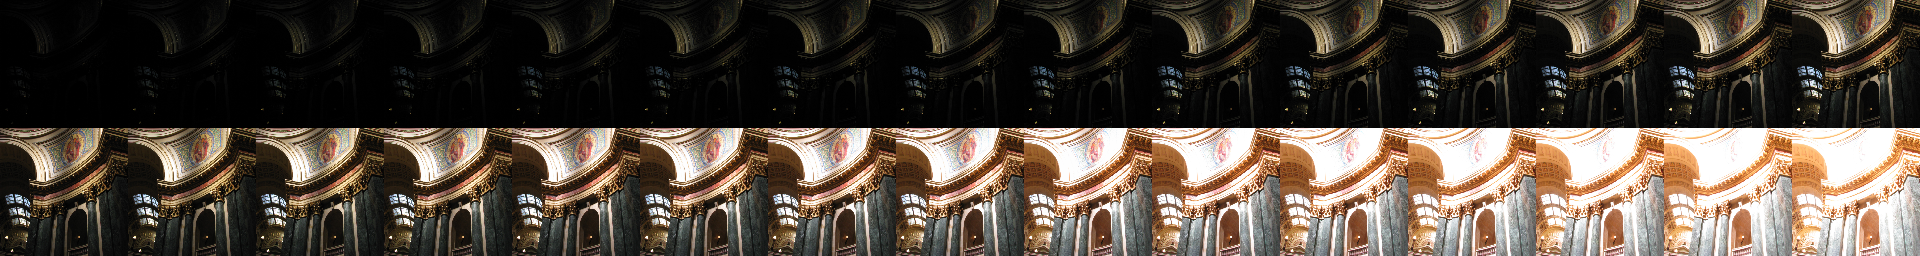

In [ ]:
for montage in montages:
	cv2_imshow(montage)

#### Align the images

In [ ]:
# Align input images
alignMTB = cv.createAlignMTB()
alignMTB.process(ims, ims)


#### Camera response function



In [ ]:
# Obtain Camera Response Function (CRF)
calibrateDebevec = cv.createCalibrateDebevec()
responseDebevec = calibrateDebevec.process(ims, timez)


In [ ]:
responseDebevec[:,0,2]

array([3.7280163e-03, 7.1159638e-03, 1.2756323e-02, 1.9796636e-02,
       2.6988164e-02, 3.3669908e-02, 3.9145913e-02, 4.3755282e-02,
       4.8172604e-02, 5.3206470e-02, 5.8755107e-02, 6.4928375e-02,
       7.1059719e-02, 7.7288158e-02, 8.3223708e-02, 8.8699117e-02,
       9.3533598e-02, 9.7907826e-02, 1.0220908e-01, 1.0690563e-01,
       1.1186190e-01, 1.1663800e-01, 1.2134880e-01, 1.2624042e-01,
       1.3118631e-01, 1.3621947e-01, 1.4184859e-01, 1.4751984e-01,
       1.5310206e-01, 1.5898620e-01, 1.6489190e-01, 1.7088440e-01,
       1.7716309e-01, 1.8341151e-01, 1.8993360e-01, 1.9681785e-01,
       2.0382294e-01, 2.1066496e-01, 2.1668090e-01, 2.2255386e-01,
       2.2889157e-01, 2.3440847e-01, 2.4046929e-01, 2.4696213e-01,
       2.5261945e-01, 2.5800580e-01, 2.6390350e-01, 2.6982349e-01,
       2.7517584e-01, 2.8054053e-01, 2.8565463e-01, 2.8974321e-01,
       2.9202893e-01, 2.9321420e-01, 2.9500610e-01, 2.9760888e-01,
       3.0278173e-01, 3.1146163e-01, 3.2288346e-01, 3.3549324e

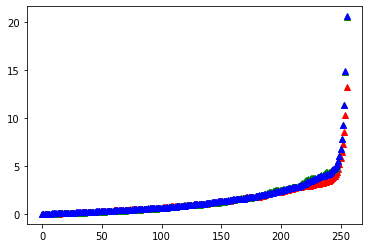

In [ ]:
pixel = np.linspace(0,255,256)
plt.plot(pixel, responseDebevec[:,0,0], 'r^', pixel, responseDebevec[:,0,1], 'g^',pixel, responseDebevec[:,0,2], 'b^')
plt.show()

#### Merge images into HDR based on Devebec

In [ ]:
# Merge images into an HDR linear image
mergeDebevec = cv.createMergeDebevec()
hdrDebevec = mergeDebevec.process(ims, timez, responseDebevec)
# Save HDR image.
cv.imwrite("hdrDebevec.hdr", hdrDebevec)


True

#### Tone Mapping
##### Tonemap using Drago's method to obtain 24-bit color image

In [ ]:
# Tonemap using Drago's method to obtain 24-bit color image
tonemapDrago = cv.createTonemapDrago(1.0, 0.7)
ldrDrago = tonemapDrago.process(hdrDebevec)
ldrDrago =  3* ldrDrago
cv.imwrite("ldr-Drago.jpg", ldrDrago * 255)


True

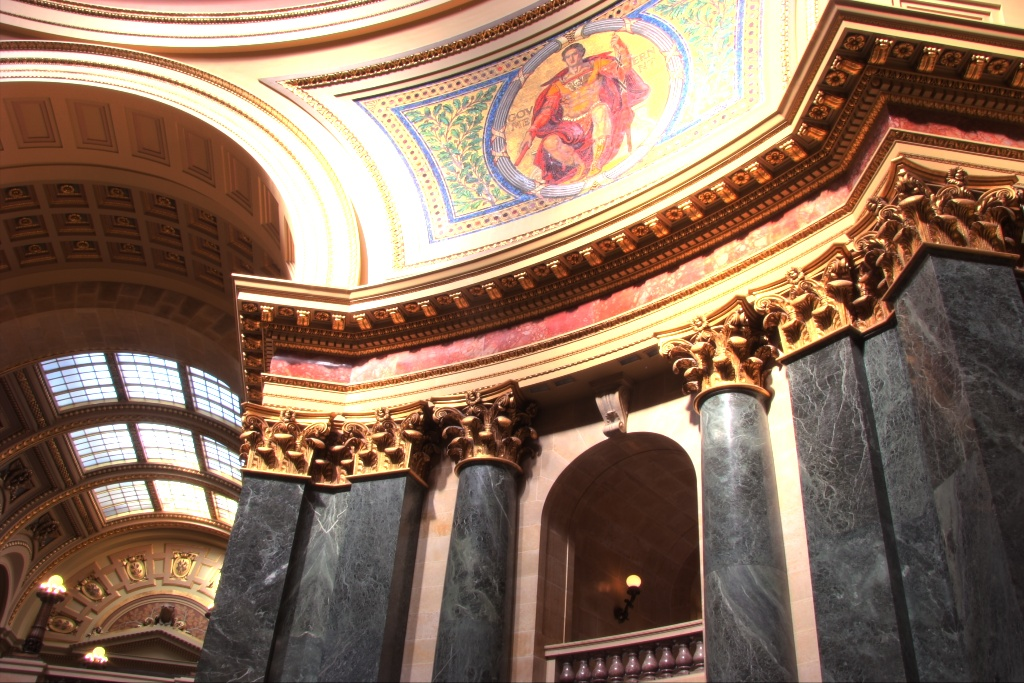

In [ ]:
hdr = cv.imread("ldr-Drago.jpg")
cv2_imshow(hdr)

##### Tonemap using Reinhard's method to obtain 24-bit color image

In [ ]:
# Tonemap using Reinhard's method to obtain 24-bit color image
tonemapReinhard = cv.createTonemapReinhard(1.5, 0,0,0)
ldrReinhard = tonemapReinhard.process(hdrDebevec)
cv.imwrite("ldr-Reinhard.jpg", ldrReinhard * 255)


True

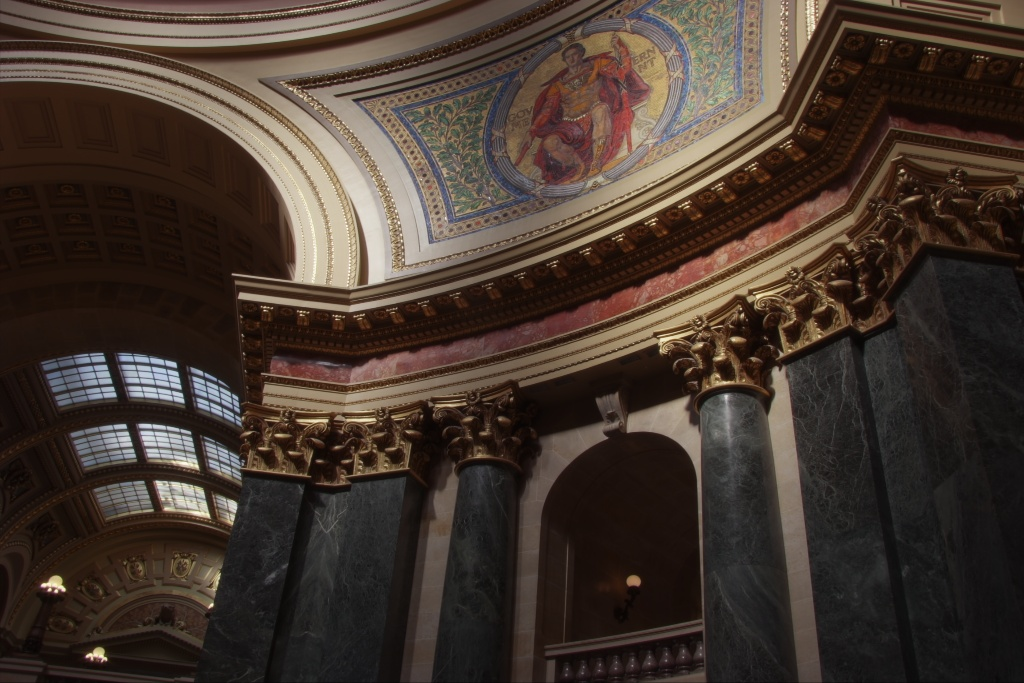

In [ ]:
hdr = cv.imread("ldr-Reinhard.jpg")
cv2_imshow(hdr)

##### Tonemap using Mantiuk's method to obtain 24-bit color image

In [ ]:
# Tonemap using Mantiuk's method to obtain 24-bit color image
tonemapMantiuk = cv.createTonemapMantiuk(2.2,0.85, 1.2)
ldrMantiuk = tonemapMantiuk.process(hdrDebevec)
ldrMantiuk = 3 * ldrMantiuk
cv.imwrite("ldr-Mantiuk.jpg", ldrMantiuk * 255)


True

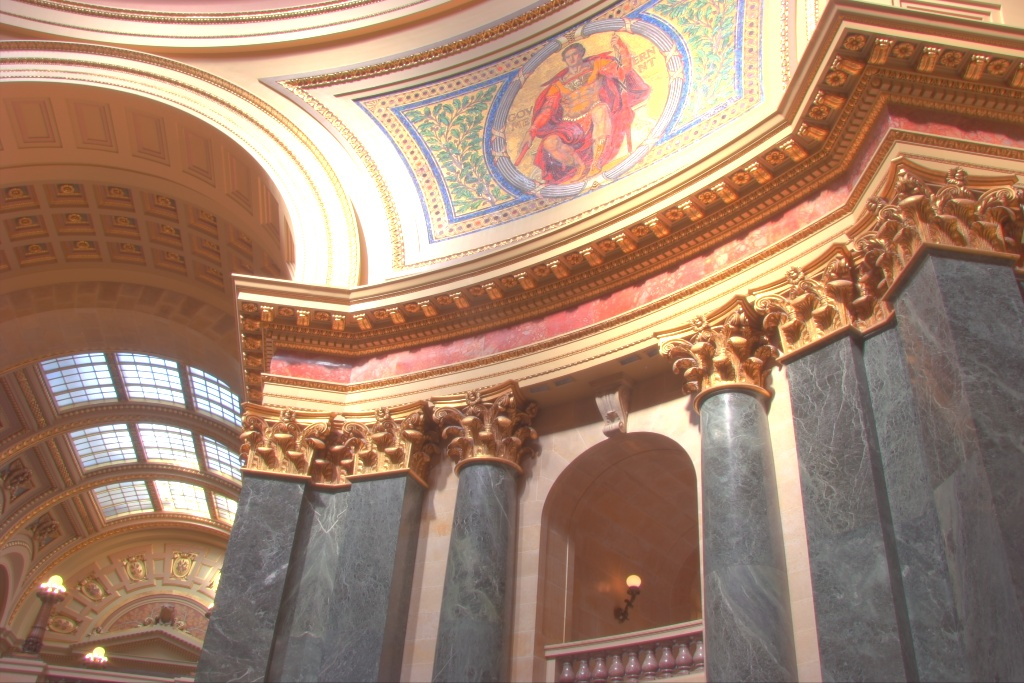

In [ ]:
hdr = cv.imread("ldr-Mantiuk.jpg")
cv2_imshow(hdr)

## Exposure Fusion

In [ ]:
merge_mertens = cv.createMergeMertens()
fusion = merge_mertens.process(ims)

In [ ]:
cv.imwrite('exp-fusion.jpg', fusion * 255)

True

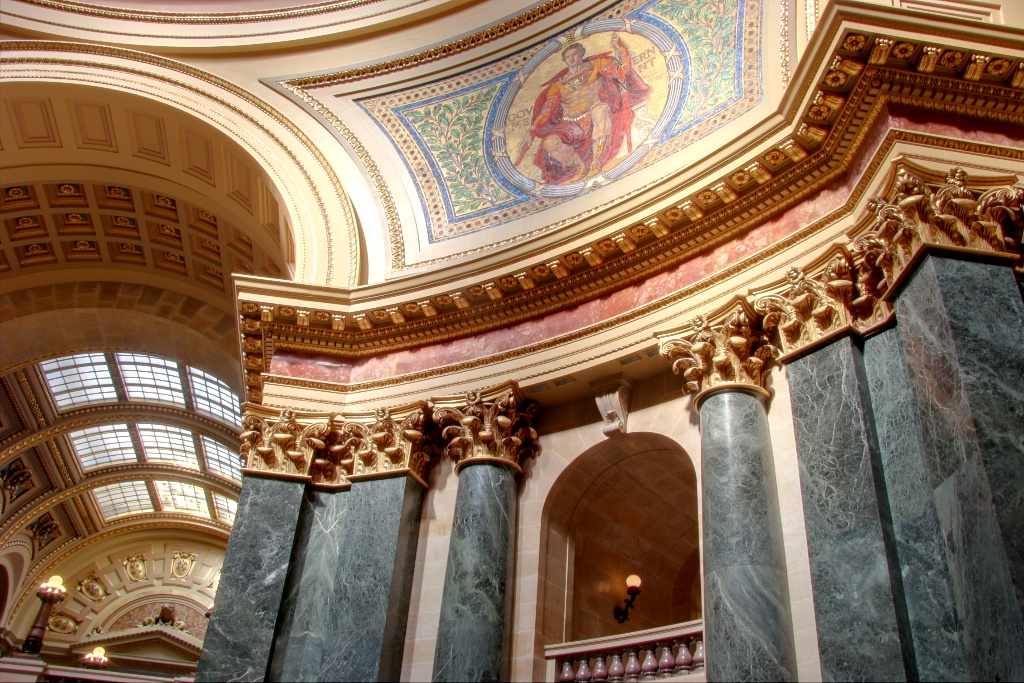

In [ ]:
fuse = cv.imread("exp-fusion.jpg")
cv2_imshow(fuse)